In [1]:
import pandas as pd
df = pd.read_csv("./matches_1930_2022.csv")
df = pd.DataFrame(df, columns= ['home_team','away_team','home_score'])
df.head(5)

,home_team,away_team,home_score
0,Argentina,France,3
1,Croatia,Morocco,2
2,France,Morocco,2
3,Argentina,Croatia,3
4,Morocco,Portugal,1


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
B=nx.Graph()
Home_Team=df['home_team']
Away_Team=df['away_team']
print('Doi san nha', Home_Team.nunique())
print('Dat nuoc', Away_Team.nunique()) 
print('Số cạnh', len(df))

Doi san nha 82
Dat nuoc 86
Số cạnh 964


In [3]:
for index, row in df.iterrows():
    B.add_edge(row['home_team'], row['away_team'], weight=1)
B.add_nodes_from(Home_Team, bipartite=0)
B.add_nodes_from(Away_Team, bipartite=1)

<Figure size 400x400 with 0 Axes>

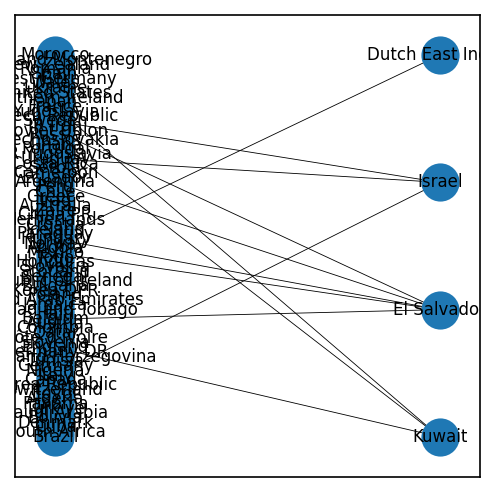

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=150)
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B, Home_Team), font_size=8, width=0.4)

In [5]:
import networkx as nx
graph = nx.from_pandas_edgelist(
    df,
    source="home_team",
    target="away_team",
    edge_attr=["home_score"],
    create_using=nx.DiGraph
)
n_nodes = graph.number_of_nodes()
n_edges = graph.number_of_edges() 
stats = pd.DataFrame(graph.nodes()) 
stats.columns = ['Node']

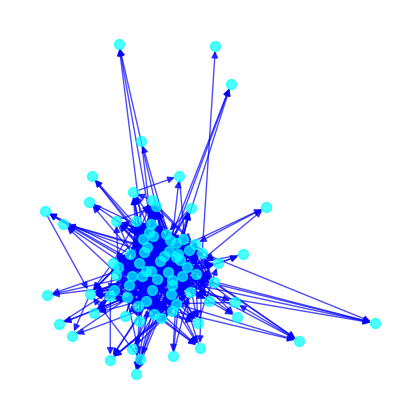

In [6]:
import matplotlib.pyplot as plt 
import networkx as nx
pos = nx.spring_layout(graph,k=0.15, iterations=20)
plt.figure(figsize=(4,4)) 
edge_width = [0.1*graph[u][v]['home_score'] for u,v in graph.edges()] 
nx.draw(graph,pos, node_size = 50, node_color = 'cyan', 
          alpha=0.7, edge_color='blue', with_labels= False , width=True)
plt.show() 

In [7]:
labels = nx.get_edge_attributes(B, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
df2.to_csv(r'mydata4.csv', index = False, header=True)

<ipython-input-7-644173bd6ec4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
<ipython-input-7-644173bd6ec4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
<ipython-input-7-644173bd6ec4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
<ipython-input-7-644173bd6ec4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1

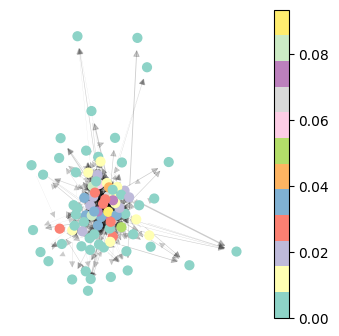

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi = 100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='Set3',
                               node_color=list(nx.betweenness_centrality(graph).values()))
edges = nx.draw_networkx_edges(graph, pos, alpha = 0.2, edge_color='black', width = edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
betweeness_centrality = [v for k, v in nx.betweenness_centrality_subset(graph, graph.nodes, graph.nodes).
                         items()]
stats[ 'Betweeness'] = betweeness_centrality
stats_betweeness_centrality = stats[['Node', 'Betweeness']]
stats_betweeness_centrality.sort_values(by = 'Betweeness', ascending = False).head(10)

,Node,Betweeness
6,Brazil,666.945650
5,England,590.741090
8,Spain,557.706047
7,Netherlands,527.071497
0,Argentina,522.417492
45,Italy,510.700512
17,Uruguay,449.130932
1,France,419.928876
27,Mexico,352.192887
32,Sweden,313.679921


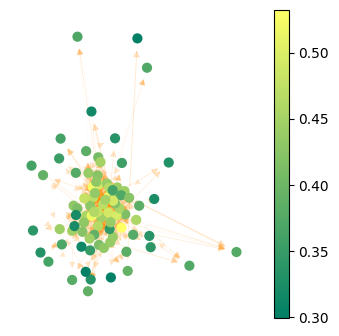

In [10]:
#Closeness Centrality
fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi = 100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='summer',
                               node_color=list(nx.closeness_centrality(graph).values()))
edges = nx.draw_networkx_edges(graph, pos, alpha = 0.2, edge_color='darkorange', width = edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [16]:
#Top 10 Cloessness Centrality
closeness_centrality = [v for k, v in nx.closeness_centrality(graph.reverse(), wf_improved = False).
                         items()]
stats[ 'closeness'] = closeness_centrality
stats_closeness_centrality = stats[['Node', 'closeness']]
stats_closeness_centrality.sort_values(by = 'closeness', ascending = False).head(10)

,Node,closeness
6,Brazil,0.664062
0,Argentina,0.629630
5,England,0.598592
45,Italy,0.598592
23,Germany,0.594406
17,Uruguay,0.582192
8,Spain,0.570470
7,Netherlands,0.566667
1,France,0.566667
32,Sweden,0.566667


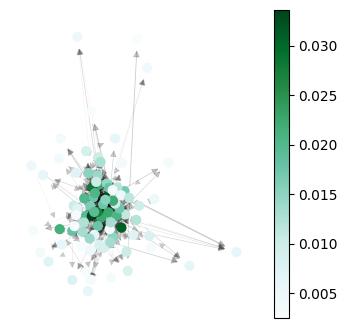

In [20]:
#Page rank
fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi = 100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='BuGn',
                               node_color=list(nx.pagerank(graph).values()), nodelist = nx.pagerank(graph))
edges = nx.draw_networkx_edges(graph, pos, alpha = 0.2, edge_color='black', width = edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [21]:
#Top 10 Page Rank
page_rank = [v for k, v in nx.pagerank(graph).items()]
stats[ 'Pagerank'] = page_rank
stats_pagerank = stats[['Node', 'Pagerank']]
stats_pagerank.sort_values(by = 'Pagerank', ascending = False).head(10)

,Node,Pagerank
8,Spain,0.033631
17,Uruguay,0.032442
27,Mexico,0.031017
5,England,0.028183
7,Netherlands,0.027173
4,Portugal,0.022810
6,Brazil,0.022789
1,France,0.022421
45,Italy,0.022254
30,IR Iran,0.021634


In [26]:
# KMeans
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = df
distorsitions = []
for k in range(1, 10, 2):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  distorsitions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 2.5))
plt.plot(range(1, 10, 2), distorsitions)
plt.grid(True)

ValueError: ignored